In [1]:
%matplotlib inline 
%reload_ext autoreload
%autoreload 2

In [2]:
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['font.family'] = 'Arial'

In [3]:
import os

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

from scipy.stats import spearmanr

In [4]:
from access_biology_data import meta, relations, annotation, properties
from access_literature_data import medline
from access_science_shared import standardizer

import sys
sys.path.append('./../src/')
from aging_tools import inout, export, calculators
from access_aging_data import chaperome, earlier_studies, sequencing


In [5]:
import random

In [6]:
import matplotlib
matplotlib.rcParams.update({'font.size': 10})

In [7]:
save_images = True
save_late_images = True

In [8]:
from narrative import nar181026_heat_confidence_genes

In [9]:
ref_genes = standardizer.reference_genes(10090, 'orp')  # only consider supported protein coding-genes

/Users/tstoeger/opt/miniconda3/envs/aging/lib/python3.7/site-packages/fastparquet/dataframe.py:5: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import CategoricalIndex, RangeIndex, Index, MultiIndex


In [10]:
p = export.get_material_path('221011_transcript_length_tilting/stats_on_imbalance_221013_0756.xlsx')

In [11]:
df = pd.read_excel(p)

In [12]:
df[
    (df['younger']==18) &
    (df['older']==24)
].sort_values('corr')

,condition,corr,pval,genes,younger,older,tissue
109,Kidney_0_18_24,-0.728915,0.000000e+00,6862,18,24,Kidney
169,SI_0_18_24,-0.317852,2.883093e-275,11802,18,24,SI
189,Stomach_0_18_24,-0.286819,8.181994e-204,10812,18,24,Stomach
39,BAT_0_18_24,-0.228894,2.943881e-130,10960,18,24,BAT
199,WAT_0_18_24,-0.201073,2.459274e-105,11515,18,24,WAT
79,Esophagus_0_18_24,-0.197133,1.269468e-102,11675,18,24,Esophagus
29,Adrenal_0_18_24,-0.157661,1.576011e-66,11797,18,24,Adrenal
49,Blood_0_18_24,-0.113157,1.581532e-27,9173,18,24,Blood
159,MuscSat_0_18_24,-0.099460,1.400919e-24,10537,18,24,MuscSat
179,Skin_0_18_24,-0.082477,1.188635e-19,12055,18,24,Skin


In [13]:
df[
    (df['younger']==4) & 
    (df['older']==24)
]

,condition,corr,pval,genes,younger,older,tissue
3,AM_0_4_24,-0.099084,2.436934e-18,7736,4,24,AM
13,AT2_0_4_24,-0.127771,2.776394e-31,8225,4,24,AT2
23,Adrenal_0_4_24,-0.162002,1.071439e-58,9814,4,24,Adrenal
33,BAT_0_4_24,-0.334887,1.302679e-218,8376,4,24,BAT
43,Blood_0_4_24,-0.646453,3.798712e-95,794,4,24,Blood
53,Brain_0_4_24,0.193236,7.135376e-96,11345,4,24,Brain
63,Cerebellum_0_4_24,-0.033110,4.951573e-04,11065,4,24,Cerebellum
73,Esophagus_0_4_24,-0.310671,1.923841e-151,6772,4,24,Esophagus
83,GutEP_0_4_24,-0.254853,6.099791e-122,8214,4,24,GutEP
93,Heart_0_4_24,-0.199111,4.546564e-101,11263,4,24,Heart


In [14]:
df = df[
    (df['younger']==4) 
]

In [15]:
tissues = df['tissue'].unique()
ages = [9, 12, 18, 24]

In [16]:
df.loc[:, 'log_pval'] = df['pval'].apply(lambda x: -np.log10(x))

In [17]:
df.pivot(index='tissue', columns='older', values='log_pval').apply(
    lambda x: np.round(x, 2)).median(1).sort_values()

tissue
MoDC            7.000
MuscSat         9.215
BAT            10.975
Cerebellum     11.485
Adrenal        12.230
AM             12.405
WAT            18.120
Liver          21.660
AT2            26.260
Lung           31.385
SI             40.815
Blood          43.275
GutEP          54.040
Brain          87.285
Esophagus     110.570
Heart         111.150
Skin          143.700
Stomach       217.460
Kidney            inf
LI                inf
dtype: float64

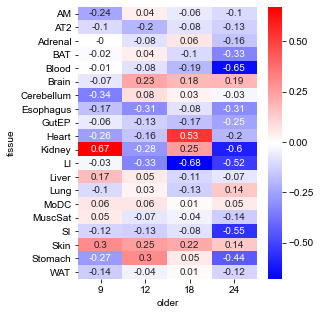

In [18]:
plt.figure(figsize=(4, 5))




sns.heatmap(
    df.pivot(index='tissue', columns='older', values='corr').apply(lambda x: np.round(x, 2)),
    cmap='bwr',
    annot=True

)



if save_images:
    export.export_image(
        '221011_extent_and_significance_of_tiliting/tilt.pdf')

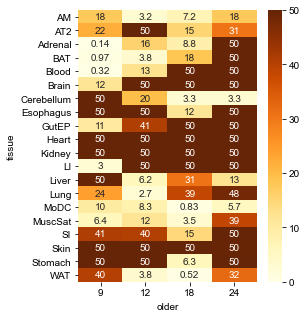

In [19]:
plt.figure(figsize=(4, 5))



h = df.pivot(index='tissue', columns='older', values='log_pval').apply(lambda x: np.round(x, 2))
f = h>50
h[f] = 50

sns.heatmap(
    h,
    cmap='YlOrBr', 
    annot=True,
    vmax=50,
    vmin=0
)



if save_images:
    export.export_image(
        '190412_extent_and_significance_of_tiliting/pval_tilt.pdf')

In [20]:
def nice_plot(h,vmax):
    t = h.copy()
    
    tissue_dict = {
        'Adrenal': 'Adrenal gland',
        'BAT': 'Brown adipose tissue',
        'Blood': 'Blood',
        'Brain': 'Frontal cortex',
        'Cerebellum': 'Cerebellum',
        'Esophagus': 'Esophagus',
        'GutEP': 'Gut epithelium',
        'Heart': 'Heart',
        'Kidney': 'Kidney',
        'LI': 'Large intestine',
        'Liver': 'Liver',
        'Lung': 'Lung',
        'MuscSat': 'Muscle satellite cells',
        'SI': 'Small intestine',
        'Skin': 'Skin',
        'Stomach': 'Stomach',
        'WAT': 'White adipose tissue'
    }
    
    t = t.rename(index=tissue_dict)
    t = t.sort_index()
    
    plt.figure(figsize=(4, 5))


    sns.heatmap(
        t, 
        cmap='YlOrBr', 
        annot=True,
        vmin=0,
        vmax=50
    )

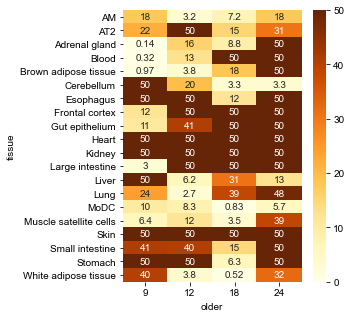

In [21]:
nice_plot(
    h,
    vmax=50
)



if save_images:
    export.export_image(
        '221011_extent_and_significance_of_tiliting/pval_tilt_nice.pdf')

In [22]:
def nice_bwr(h):
    t = h.copy()
    
    tissue_dict = {
        'Adrenal': 'Adrenal gland',
        'BAT': 'Brown adipose tissue',
        'Blood': 'Blood',
        'Brain': 'Frontal cortex',
        'Cerebellum': 'Cerebellum',
        'Esophagus': 'Esophagus',
        'GutEP': 'Gut epithelium',
        'Heart': 'Heart',
        'Kidney': 'Kidney',
        'LI': 'Large intestine',
        'Liver': 'Liver',
        'Lung': 'Lung',
        'MuscSat': 'Muscle satellite cells',
        'SI': 'Small intestine',
        'Skin': 'Skin',
        'Stomach': 'Stomach',
        'WAT': 'White adipose tissue'
    }
    
    t = t.rename(index=tissue_dict)
    t = t.sort_index()
    
    plt.figure(figsize=(4, 5))


    sns.heatmap(
        t, 
        cmap='bwr', 
        annot=True,
    )

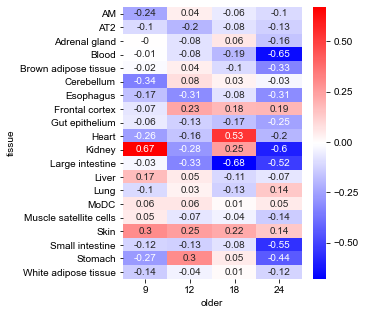

In [23]:
nice_bwr(
    df.pivot(index='tissue', columns='older', values='corr').apply(lambda x: np.round(x, 2))
)



if save_images:
    export.export_image(
        '221011_extent_and_significance_of_tiliting/tilt_nice.pdf')

In [24]:
p = export.get_material_path('221011_transcript_length_tilting/stats_on_imbalance_221013_0756.xlsx')
df = pd.read_excel(p)

In [25]:
def nice_plot(h,vmax):
    t = h.copy()
    
    tissue_dict = {
        'Adrenal': 'Adrenal gland',
        'BAT': 'Brown adipose tissue',
        'Blood': 'Blood',
        'Brain': 'Frontal cortex',
        'Cerebellum': 'Cerebellum',
        'Esophagus': 'Esophagus',
        'GutEP': 'Gut epithelium',
        'Heart': 'Heart',
        'Kidney': 'Kidney',
        'LI': 'Large intestine',
        'Liver': 'Liver',
        'Lung': 'Lung',
        'MuscSat': 'Muscle satellite cells',
        'SI': 'Small intestine',
        'Skin': 'Skin',
        'Stomach': 'Stomach',
        'WAT': 'White adipose tissue'
    }
    
    t = t.rename(index=tissue_dict)
    t = t.sort_index()
    
    plt.figure(figsize=(4, 5))


    sns.heatmap(
        t, 
        cmap='YlOrBr', 
        annot=True,
        vmin=0,
        vmax=vmax,
        fmt='g'
    )

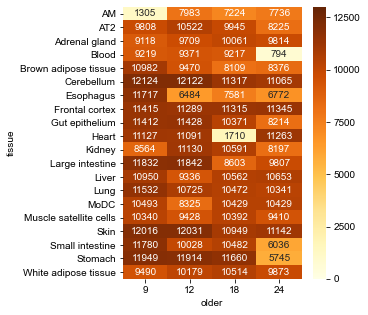

In [26]:
nice_plot(
    df[df['younger']==4].pivot(index='tissue', columns='older', values='genes'),
    13000
)

if save_late_images:
    export.export_image(
        '221011_extent_and_significance_of_tiliting/number_of_genes.pdf')